In [35]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator # Pour augmenter le nombre de données. 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt
import numpy as np
from  scipy import ndimage
from keras import regularizers
from keras.layers.normalization import BatchNormalization

In [36]:
batch_size = 32 #networks train faster with mini-batches. That's because we update the weights after each propagation.
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
model_name = 'keras_cifar10_trained_model.h5'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


x_train shape: (5000, 32, 32, 3)
5000 train samples
5000 test samples


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


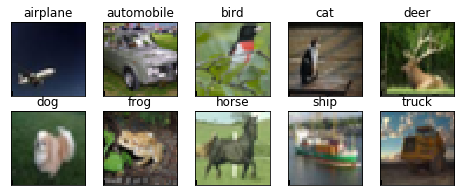

In [37]:
# The data, split between train and test sets:
(x_train_full, y_train_full), (x_test_full, y_test_full) = cifar10.load_data()


x_train = x_train_full[:5000]
y_train = y_train_full[:5000]
x_test, y_test = x_test_full[:5000], y_test_full[:5000]

x_train = x_train/255  #Standardized
x_test = x_train/255

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0] #return elements with conditions, [0] : return index
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0]) #Return random integers (one element)
    im = np.transpose(features_idx[img_num,::], (1, 0, 2))#Permute the dimensions of an array #(height,width,dim)
    rotated_img = ndimage.rotate(im, -90)
    ax.set_title(class_names[i])
    plt.imshow(rotated_img)
   
plt.show()


In [38]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [39]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization()) #couche avec parametres pour normalization des données en sortie. Highter lr, reduces overfiting. 
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay))) #kernel_regularizer: Regularizer function applied to the kernel weights matrix.
#méthode de dégradation des pondérations ou weight decay, pour limiter le surapprentissage.
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4)) #désactiver » des sorties de neurones aléatoirement, force chaque neurone a bien apprendre. 
 
model.add(Flatten()) #donées en 1D pour dense qui suit. 
model.add(Dense(num_classes, activation='softmax'))
# padding = same (input=output= zero padding) or valid (no padding) or causal (for dilated convolution) 

In [7]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [40]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  = x_train/250
x_test = x_test/250

In [41]:
history = model.fit(x_train, y_train,
              batch_size=batch_size, 
              epochs=epochs,
              validation_data=(x_test, y_test),
shuffle=True)

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 66s 13ms/step - loss: 2.7685 - acc: 0.2808 - val_loss: 5.3144 - val_acc: 0.0994
Epoch 2/10
5000/5000 [==============================] - 66s 13ms/step - loss: 2.1428 - acc: 0.3756 - val_loss: 11.3799 - val_acc: 0.0976
Epoch 3/10
5000/5000 [==============================] - 65s 13ms/step - loss: 1.8427 - acc: 0.4480 - val_loss: 14.5146 - val_acc: 0.1024
Epoch 4/10
5000/5000 [==============================] - 65s 13ms/step - loss: 1.6283 - acc: 0.4984 - val_loss: 14.5441 - val_acc: 0.1008
Epoch 5/10
5000/5000 [==============================] - 64s 13ms/step - loss: 1.4546 - acc: 0.5480 - val_loss: 14.5992 - val_acc: 0.0976
Epoch 6/10
5000/5000 [==============================] - 65s 13ms/step - loss: 1.3246 - acc: 0.5842 - val_loss: 14.6029 - val_acc: 0.0976
Epoch 7/10
5000/5000 [==============================] - 65s 13ms/step - loss: 1.2106 - acc: 0.6234 - val_loss: 12.0704 - val_acc: 0

In [9]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

5000/5000 [==============================] - 12s 2ms/step
Test loss: 9.496095748138428
Test accuracy: 0.0976


In [42]:
import pandas as pd

df=pd.DataFrame(history.history)
df

,val_loss,val_acc,loss,acc
0,5.314354,0.0994,2.768484,0.2808
1,11.379880,0.0976,2.142832,0.3756
2,14.514593,0.1024,1.842717,0.4480
3,14.544067,0.1008,1.628267,0.4984
4,14.599245,0.0976,1.454614,0.5480
5,14.602892,0.0976,1.324557,0.5842
6,12.070440,0.0976,1.210581,0.6234
7,4.875763,0.1008,1.126145,0.6404
8,14.613604,0.0976,1.005826,0.6874
9,10.067097,0.0994,0.955780,0.7082


Text(0.5, 1.0, 'Loss Curves')

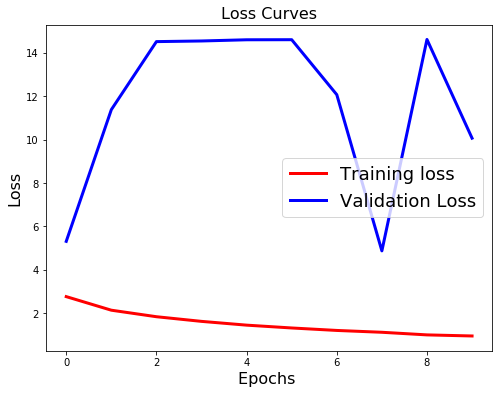

In [43]:
import matplotlib.pyplot as plt

# Loss Curves, residual sum of squares for classification and regression respectively.
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# the red curve must be upper the blue curve if overfitting is avoid

Text(0.5, 1.0, 'Accuracy Curves')

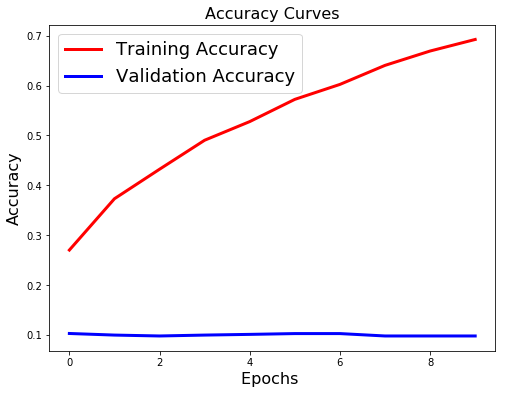

In [12]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16) #The blue curve must be the same as the red for the most efficient training. Surentrainement. A appris les données par coeur sans les comprendre. 

In [51]:
import pickle as pkl
from PIL import Image
import numpy as np

imgpil = Image.open("boeing-avion.jpg") 

img = np.array(imgpil)

#to save it
with open("train.pkl", "wb") as f:
    pkl.dump([x_train, y_train], f) #opened in non-text binary file, (for image file) 
    pkl.dump(img, f)
#to load it

with open("train.pkl", "rb") as f:
    x_train, y_train = pkl.load(f)
    avion =  pkl.load(f)


avion.shape

(2640, 3300, 3)

In [52]:
from resizeimage import resizeimage


# predicting images

imgpil = resizeimage.resize_contain(imgpil, [32, 32])
imgpil = np.array(imgpil)
imgpil = imgpil.astype("float") / 255.0
imgpil = np.expand_dims(imgpil, axis=0) #ajoute la 3eme dimension pour les 3 couleurs. 

predictions = model.predict(imgpil)

np.argmax(predictions[0]) #donne la classe. 

1